In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# **Original Data**

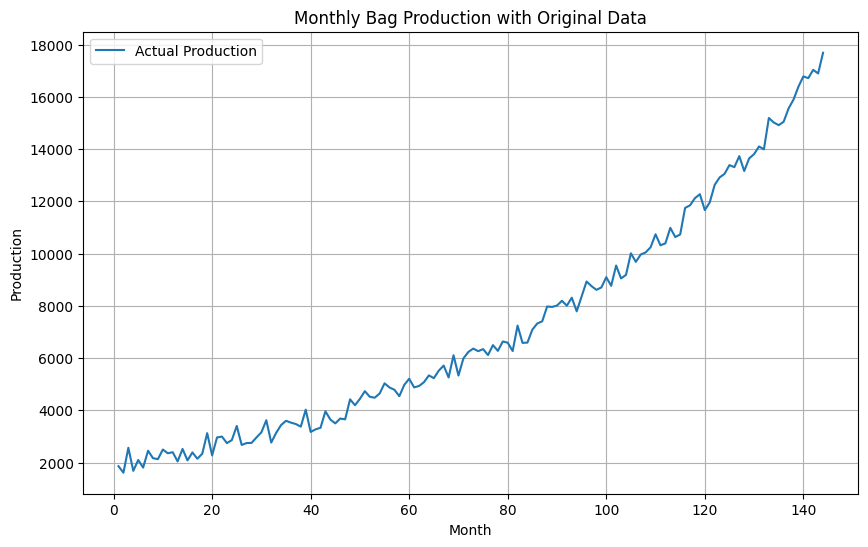

In [ ]:
# Read the data
data = pd.read_csv('aol_data.xlsx - in.csv')

# Convert string data to float
monthly_production = data.values.flatten()

# Create a numeric index for months
month = np.arange(1, len(monthly_production) + 1)

# Plot the original data and the trend line
plt.figure(figsize=(10, 6))
plt.plot(month, monthly_production, label='Actual Production')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Monthly Bag Production with Original Data')
plt.legend()
plt.grid(True)
plt.show()

# **Problem 1**

Coefficients:
['0.004', '-0.134', '47.224', '1748.507']




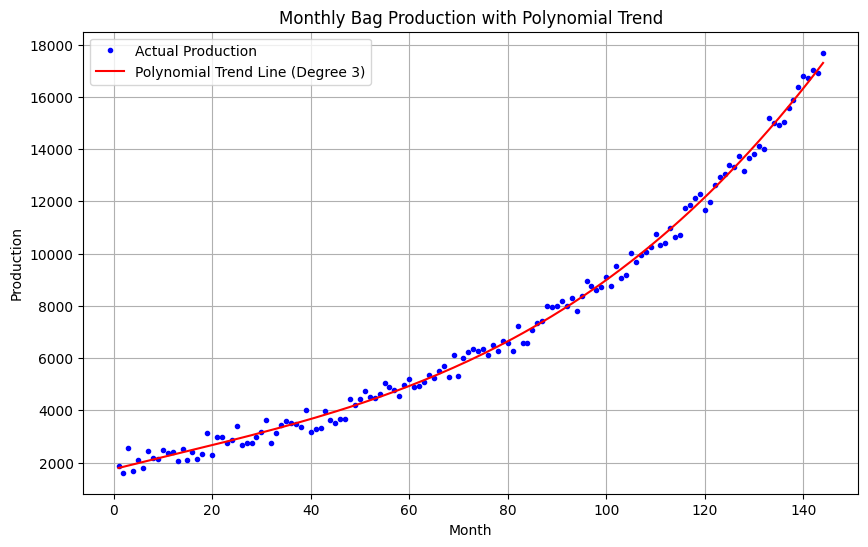

In [ ]:
# Read the data
data = pd.read_csv('aol_data.xlsx - in.csv')

# Convert string data to float
monthly_production = data.values.flatten()

# Create a numeric index for months
x = np.arange(1, len(monthly_production) + 1)
y = monthly_production

# Fit a polynomial regression model
degree = 3
coefficients = np.polyfit(month, monthly_production, degree)

 # Print coefficients
print("Coefficients:")
print([f'{coeff:.3f}'for coeff in coefficients])
print("\n")

# Create a polynomial function
polynomial_function = np.poly1d(coefficients)

# Predictions
trend_poly = polynomial_function(month)

# Plot the original data and the trend line
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b.', label='Actual Production')
plt.plot(x, trend_poly, 'r', label=f'Polynomial Trend Line (Degree {degree})')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Monthly Bag Production with Polynomial Trend')
plt.legend()
plt.grid(True)
plt.show()


# **Problem 2**

<ipython-input-8-0720e938afe4>:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'b.', color = 'g', label='Actual Production')
<ipython-input-8-0720e938afe4>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, trend_poly, 'g', color = 'b', label=f'Polynomial Trend Line (Degree {degree})')


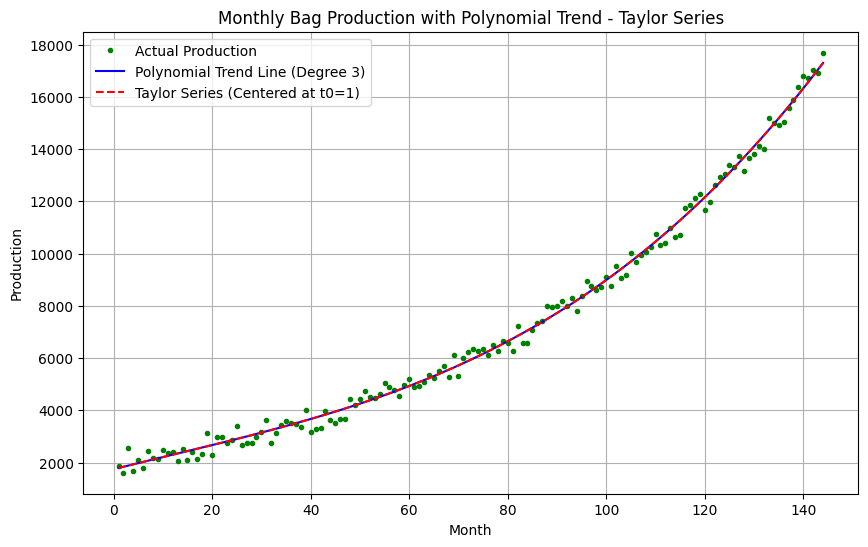

Polynomial Coefficients (Cubic):
c_3: 0.004
c_2: -0.134
c_1: 47.224
c_0: 1748.507
Products Approximation in Month 100: 8990.562


In [ ]:
# Read the data
data = pd.read_csv('aol_data.xlsx - in.csv')  # Ensure your CSV file is correctly named and accessible

# Convert string data to float
monthly_production = data.values.flatten()

# Create a numeric index for months
x = np.arange(1, len(monthly_production) + 1)
y = monthly_production

# Create the design matrix for polynomial regression
degree = 3
X = np.vstack([x**i for i in range(degree + 1)]).T

# Perform the least squares regression
b = y[:, np.newaxis]  # Reshape y to a column vector for matrix multiplication
coefficients = np.dot(np.linalg.pinv(X), b).flatten()  # Flatten to simplify handling

# Round the coefficients to three decimal places
coefficients_rounded = np.round(coefficients, 3)

# Define a polynomial function
def polynomial_function(coefficients, x):
    approximation = sum(coefficients[i] * (x ** i) for i in range(len(coefficients)))
    return approximation

# Define a function for Taylor Series approximation using the coefficients
def taylor_series_approximation(coefficients, x, t0=1):
    c0, c1, c2, c3 = coefficients

    # Derivatives at t0
    y_t0 = c3 * t0**3 + c2 * t0**2 + c1 * t0 + c0      # f(t0)
    y_t1 = 3 * c3 * t0**2 + 2 * c2 * t0 + c1          # f'(t0)
    y_t2 = 6 * c3 * t0 + 2 * c2                       # f''(t0)
    y_t3 = 6 * c3                                     # f'''(t0)

    # Taylor series expansion
    return y_t0 + y_t1 * (x - t0) + (y_t2 / 2) * (x - t0)**2 + (y_t3 / 6) * (x - t0)**3

# Generate trend predictions using the polynomial and Taylor Series approximation
trend_poly = np.array([polynomial_function(coefficients, xi) for xi in x])
trend_poly_taylor = taylor_series_approximation(coefficients, x, t0=1)

# Plot the original data and the trend lines
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b.', color = 'g', label='Actual Production')
plt.plot(x, trend_poly, 'g', color = 'b', label=f'Polynomial Trend Line (Degree {degree})')
plt.plot(x, trend_poly_taylor, 'r--', label=f'Taylor Series (Centered at t0=1)')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Monthly Bag Production with Polynomial Trend - Taylor Series')
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Polynomial Coefficients (Cubic):")
for i, coef in enumerate(coefficients_rounded[::-1]):
    print(f"c_{degree - i}: {float(coef):.3f}")

# Test the Taylor Series approximation for a specific month
month_tested = 100
approx_tested = taylor_series_approximation(coefficients, month_tested, t0=1)
print(f"Products Approximation in Month {month_tested}: {float(approx_tested):.3f}")


# **Problem 3**

<ipython-input-11-7a2ab5fbae87>:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_future = np.arange(start_month, end_month)


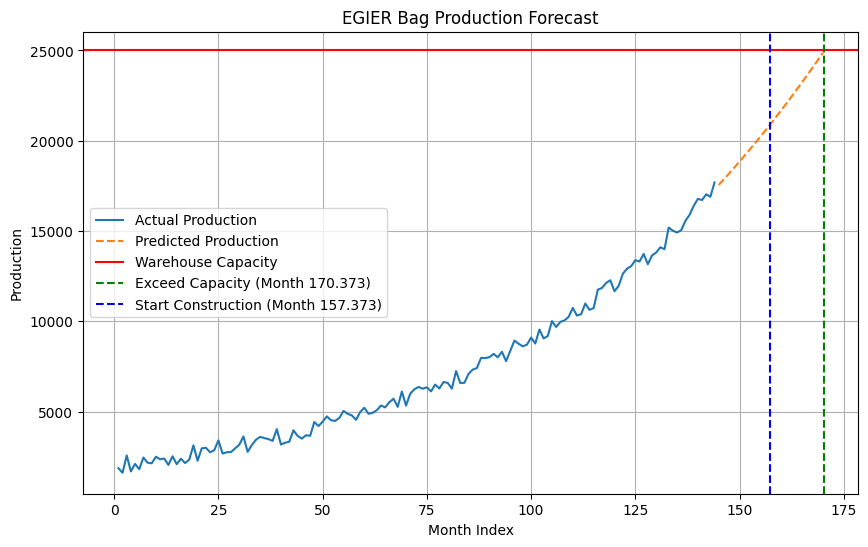

Predicted month to exceed warehouse capacity: Month 170.373
Recommended month to start construction: Month 157.373


In [ ]:
# Read the data
data = pd.read_csv('aol_data.xlsx - in.csv')

# Convert string data to float
monthly_production = data.values.flatten()

# Create a numeric index for months
x = np.arange(1, len(monthly_production) + 1)
y = monthly_production

# Create the design matrix for polynomial regression
degree = 3
X = np.vstack([x**i for i in range(degree + 1)]).T

# Perform the least squares regression
y = y[:, np.newaxis]
coefficients = np.dot(np.linalg.pinv(X), y)

# Define the polynomial function using the coefficients
def polynomial(x, coefficients):
    return sum(c * (x**i) for i, c in enumerate(coefficients.flatten()))

# Define the function for bisection method
warehouse_capacity = 25000

def production_diff(x):
  """Difference between predicted production and warehouse capacity."""
  return polynomial(x, coefficients) - warehouse_capacity

# Find the root using the bisection method
def bisection_method(a, b, tolerance=0.001):
    if np.sign(production_diff(a)) == np.sign(production_diff(b)):
        print("Invalid interval for bisection method.")
        return None

    while (b - a) / 2 > tolerance:
        c = (a + b) / 2
        if abs(production_diff(c)) < tolerance:
            return c
        elif np.sign(production_diff(c)) == np.sign(production_diff(a)):
            a = c
        else:
            b = c
    return (a + b) / 2

# Define start and end months for bisection
start_month = len(monthly_production) + 1  # Start after the last known month
initial_guess = len(data)
end_month = fsolve(production_diff, initial_guess)

# Find the root where production exceeds warehouse capacity
root_month_index = bisection_method(start_month, end_month[0])

if root_month_index is not None:
    # Calculate the recommended construction start month
    construction_time = 13  # months
    start_construction_month = root_month_index - construction_time

    # Future predictions for plotting
    x_future = np.arange(start_month, end_month)
    y_future = polynomial(x_future, coefficients)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Actual Production')
    plt.plot(x_future, y_future, label='Predicted Production', linestyle='--')
    plt.axhline(warehouse_capacity, color='r', linestyle='-', label='Warehouse Capacity')
    plt.axvline(root_month_index, color='g', linestyle='--', label='Exceed Capacity (Month {:.3f})'.format(root_month_index))
    plt.axvline(start_construction_month, color='b', linestyle='--', label='Start Construction (Month {:.3f})'.format(start_construction_month))
    plt.xlabel('Month Index')
    plt.ylabel('Production')
    plt.title('EGIER Bag Production Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Predicted month to exceed warehouse capacity: Month {root_month_index:.3f}")
    print(f"Recommended month to start construction: Month {start_construction_month:.3f}")